In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [42]:
df = pd.read_csv("C:/Users/ISHMO_CT/Desktop/projects/RDSB/Group_assignment/trend_data/GOOGL.csv")

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [44]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


# What Are Stocks? 
A stock (also called equity) represents ownership in a company. When you buy a stock, you own a small portion of that company and can benefit from its growth and success.

# Understanding the Google Stock Price Dataset

This dataset contains historical stock prices of Google (GOOGL) with the following columns:

| **Column**    | **Description** |
|--------------|---------------|
| **Date**     | The trading date (YYYY-MM-DD) |
| **Open**     | The price at which the stock opened that day |
| **High**     | The highest price reached that day |
| **Low**      | The lowest price reached that day |
| **Close**    | The price at which the stock closed |
| **Adj Close** | Adjusted closing price (accounts for stock splits, dividends) |
| **Volume**   | Number of shares traded that day |


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [46]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [48]:
df.shape

(4431, 7)

In [49]:
df['Date'].unique()

array(['2004-08-19', '2004-08-20', '2004-08-23', ..., '2022-03-22',
       '2022-03-23', '2022-03-24'], shape=(4431,), dtype=object)

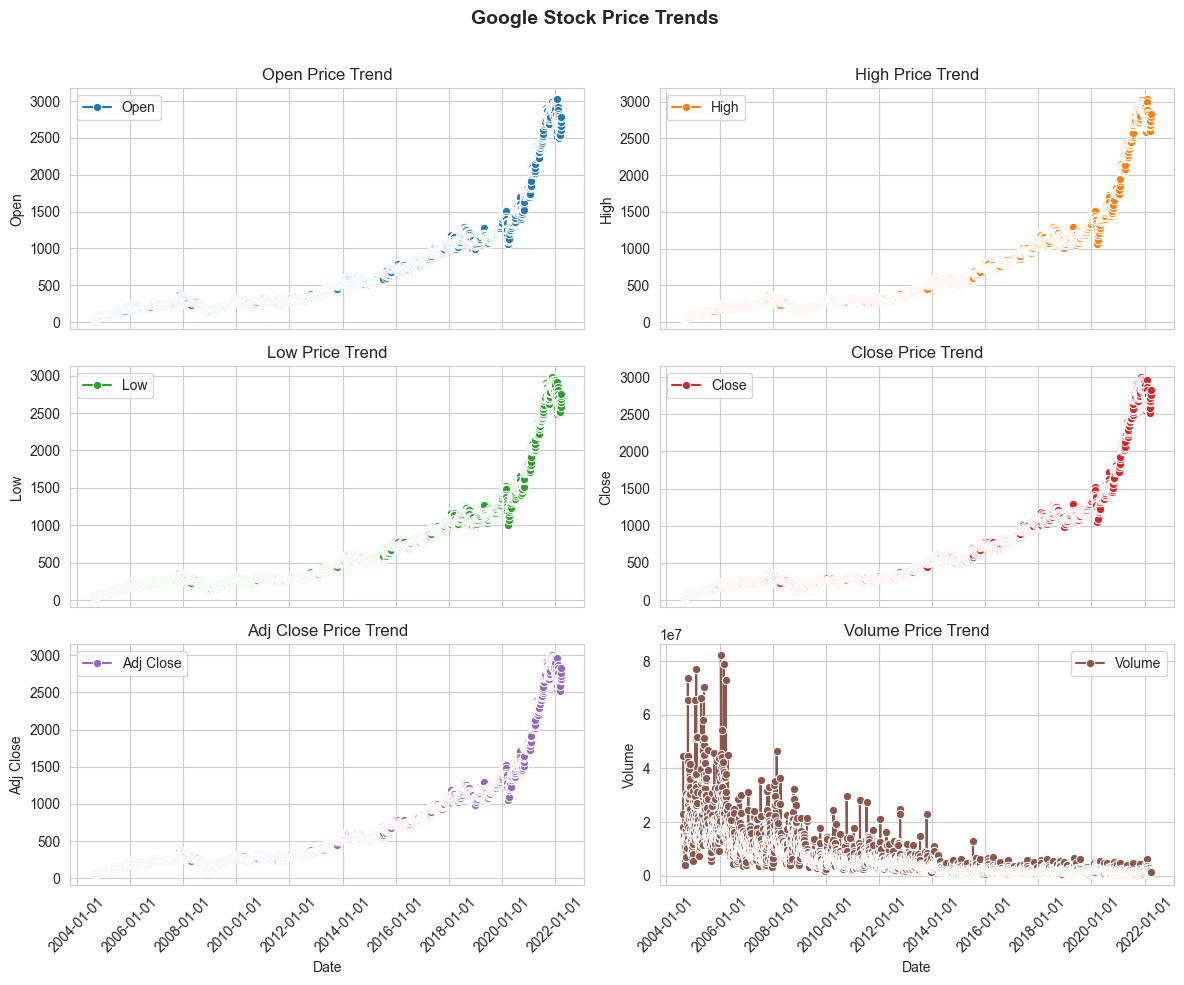

In [51]:
df["Date"] = pd.to_datetime(df["Date"])

# Define column names for plotting
columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Set Seaborn style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
fig.suptitle("Google Stock Price Trends", fontsize=14, fontweight="bold")

# Use Seaborn color palette
colors = sns.color_palette("tab10", len(columns))

# Loop through columns and plot
for ax, col, color in zip(axes.flatten(), columns, colors):
    sns.lineplot(x=df["Date"], y=df[col], marker="o", linestyle="-", ax=ax, color=color, label=col)
    ax.set_title(f"{col} Price Trend", fontsize=12)
    ax.set_ylabel(col, fontsize=10)
    ax.legend()
    ax.grid(True)

    # Format x-axis for better readability
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()